# Data structures accepted by seaborn

- 데이터 시각화 라이브러리인 Seaborn은 데이터를 필요로 합니다. 
- 이번 챕터에서는 다양한 방법으로 데이터 관련해 설명할 것입니다. 
- Seaborn은 다양한 데이터셋 형태를 지원하며 대부분의 함수는 판다스나 넘파이 혹인 파이썬 데이터 타입인 리스트나 딕션너리를 통한 데이터를 지원합니다. 
- 이런 여러 옵션과 관련된 사용패턴을 이해하는 것이 거의 모든 데이터를 빠르고 유용한 시각화를 만들어 내는데 도움이 됩니다. 

## Long-form vs wide-form data 

- 대부분의 seaborn의 시각화 함수는 데이터의 벡터에 기반되어 있습니다. 
- y에 대한 x를 시각화 할 때 각 변수는 벡터여야 합니다. 
- Seaborn은 한 개 이상의 벡터를 가진 데이터셋만 허용합니다. 
- 여기에는 `long-form` vs `wide-form` 사이에 근본적인 차이점 있습니다. 

## Long-form data

- long-form 데이터 테이블은 다음과 같은 특징을 가집니다. 
    - 각 변수는 column 입니다. 
    - 각 관측값은 row 입니다. 
- 간단한 예시로 flight 데이터셋을 살펴보겠습니다. 
- 이 데이터셋은 세가지 변수가 있습니다. (year,month,number of passengers) 

In [2]:
import seaborn as sns
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


- long-form data로 테이블의 행들은 그래프마다 역할이 주어집니다.
- 연도당 매월 승객수 시각화 그래프로 예를 들어 보겠습니다.

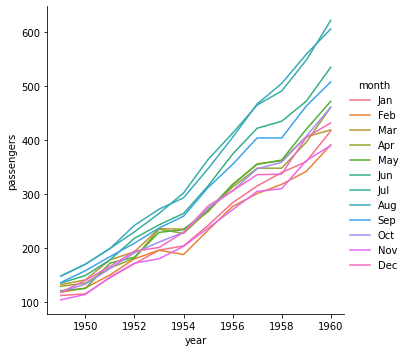

In [3]:
sns.relplot(data=flights, x='year', y='passengers', hue='month', kind='line');

- long-form 데이터의 장점은 그래프의 설명이 명백하다는 것입니다. 
- 그러기에 복잡한 데이터셋(변수과 관측치가 잘 설명된것)도 사용할 수 있습니다.
- 그러나 이런 포멧은 머리 속에서 생각한 모델은 아니기에 익숙해지려면 시간이 걸릴 수 있습니다. 

## Wide-form data 

- 간단한 데이터셋이 column과 row가 다른 레벨의 변수를 가지고 있다면 스프레드 시트에서 보는게 더 직관적일 수 있습니다. 
- 예를 들어서 우리는 flight 데이터셋을 `pivoting` 형태의 wide-form 조직으로 변경해 볼건데 그렇게 되면 각 행의 몇 년 동안의 데이터를 월별 시계열 데이터로 확인할 수 있습니다. 

In [4]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


- 여기에 우리는 같은 3가지 변수가 있지만 각각 다르게 보여집니다. 
- 데이터셋에 있는 변수들은 named fields 보다 테이블의 dimensions과 연결되어 있습니다. 
- 각 관측치는 테이블에 있는 값과 row and column의 인덱스들의 좌표로 정의되어 있습니다. 

- long-form 데이터로는 우린 그들의 이름에 따라서 변수에 접근할 수 있었습니다. 
- 하지만 wide-form data에 경우 그렇지 않습니다. 
- 그럼에도 불구하고 테이블의 dimension과 데이터셋의 변수에는 명백한 연관성이 있고 seaborn은 그러한 변수들을 그래프에 지정할 수 있습니다. 

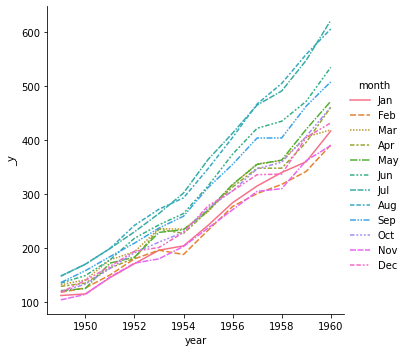

In [5]:
sns.relplot(data=flights_wide, kind='line');

- 위의 그래프는 전에 그랬던 거와 유사합니다. 
- Seaborn은 데이터 프레임의 인덱스를 `x`로 지정하고 데이터프레임의 값을 `y`로 지정하고 1월부터 12월은 다른 색깔의 선으로 나타냈습니다. 
- 하지만 여기에는 주목할만한 차이점이 있습니다. 
- 데이터셋이 피봇 작업을 통해 long-form에서 wide-form으로 전환되었을때 값이 어떤 값인지 나타내는 부분이 생략되었습니다. 
- 결론적으로, y 레이블이 없어졌습니다. 

- 그러므로 wide-form 데이터를 사용했을때 비슷한 그래프를 적은 타이핑으로 만들어 냈습니다. 
- 더 쉬워보입니다. 
- 그러나 long-form 데이터를 사용하는 장점은 데이터가 옳은 포멧이라면 구조에 대해 생각할 필요가 없다는 것입니다. 
- 단지 어떤 변수를 사용할 지만 생각하면 시각화가 가능합니다. 
- 예를 들어서 단순히 변수를 재지정함으로서 월별 시계열데이터를 선으로 나타낼 수 있습니다. 

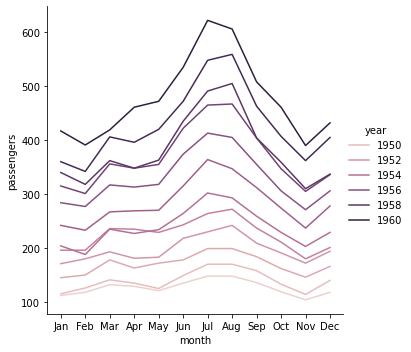

In [6]:
sns.relplot(data=flights, x='month', y='passengers', hue='year', kind='line')

- wide-form 데이터셋으로 위의 그래프를 똑같이 표현하려면 테이블을 전치행렬을 해야합니다. 

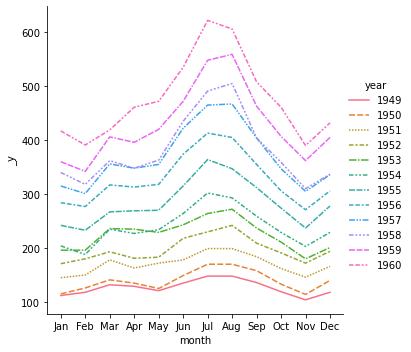

In [7]:
sns.relplot(data=flights_wide.transpose(), kind="line")

- 명백한 변수 지정의 부재는 wide-form data의 차원과 그래프에서의 역할을 각각 그래프에 정의해 줘야한다는 것을 의미합니다. 
- 그러기 그래프 종류마다 다르겠지만 wide-form 데이터를 사용할때 결과는 예측하기 어렵습니다. 
- 예를 들어 범주형 그래프는 테이블의 행 dimension을 `x`로 지정하고 row끼리 합칩니다. 

/Users/stevencheong/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/Users/stevencheong/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


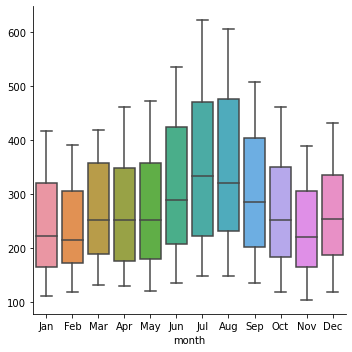

In [8]:
sns.catplot(data=flights_wide, kind='box')

- 판다스로 wide-form data를 나타낼때 당신은 몇 가지 변수들로만 제한되어 있습니다. 
- 그 이유는 seaborn은 멀티 인덱스 정보를 사용하지 않고 tabular format으로 추가적인 변수를 나타냅니다. 
- xarray 프로젝트는 N 차원의 array 객체의 레이블을 제공하는데 이는 wide-form data를 더 높은 차원으로 인식되게 합니다. 
- 현재, Seaborn은 직접적으로 xarray를 지원하지 않지만 `to_pandas`를 사용해 long-form인 `pandas.DataFrame`으로 변경될 수 있으며 다른 long-form data set과 마찬가지로 seaborn에 그릴 수 있습니다. 



- long-form data와 wide-form data는 아래의 그림처럼 이해하면 좋습니다. 

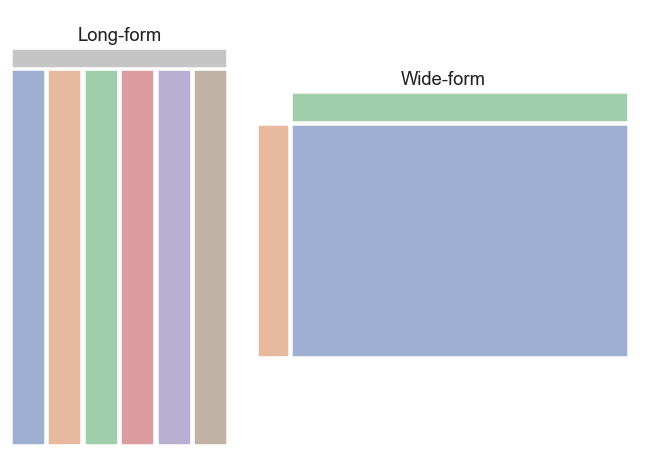